In [4]:
import numpy as np 
import scipy
import matplotlib.pyplot as plt

# Dimensionality Reduction with Principle Component Analysis

## 1 - Introduction
High dimesionality data often contains more information than we need \[3].  As such, the higher dimensions can often be represented by combinations of the other dimensions in the dataset \[3].  The main goal of dimensionality reduction is to gain a lossless lower dimension representation of data, often it is helpful to think of it as a form of compression \[3].  The purpose of this notebook is to summarize the applications and theory of principal component analysis, which is an algorithm for linear dimensionality reduction \[1,2,3]. In preparation for this notebook, it may be helpful to review Sections 3.8, 4.2 and 6.4 as these topics are heavily used in the formulation of PCA \[3]. Projections are a useful tool in compressions, as it can be possible to represent a dataset with less dimensions but high similarity. Without doing any math, a one dimesional representation of a 2D data set is shown below, and eventually we will build up the math for any dimesion.

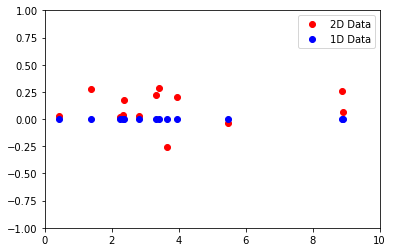

In [5]:
np.random.seed(0)
y_vals = np.random.uniform(-0.3, 0.3, 25) # generate random y coordinates
x_vals = np.random.uniform(-10, 10, 25) # generate random x coordinates
plt.figure()
plt.plot(x_vals, y_vals, 'ro', label="2D Data") # plot 2D data
plt.axis([0,10,-1,1])
plt.plot(x_vals, np.zeros(25), 'bo', label="1D Data") # plot 1D data
plt.legend()

It is easy to see that the 1D data can closely represent the 2D data. The loss in data is visualized as the y distance from a blue point to its red point vertically above or below itself.

## 2 Coordinate Representation
PCA aims to to collect the projections $\tilde{x}_n$ of data points $x_n$ \[1]. The challenge is to have our $\tilde{x_n}$ variables closely represent $x_n$.

Three equations are presented below:

\begin{equation}
\textbf{S} = \frac{1}{N}\sum_{n=1}^{N}x_nx_n^\top \tag{1}
\end{equation}
\begin{equation}
z_n = B^\top x_n \in \mathbb{R}^{M}  \tag{2}
\end{equation}
\begin{equation}
B := \begin{bmatrix}b1, ... ,b_M\end{bmatrix} \in \mathbb{R}^{D\times M} \tag{3}
\end{equation}



In short, $B$ is a projection matrix, with orthonormal columns. Our goal is to find $\tilde{x_n}$ with minimal loss from $x_n$. $U \subseteq \mathbb{R}^D,\: dim(U) = M < D$ where $\exists\: \tilde{x_n} \in U$. $U$ is the $M$ dimensional subspace onto which we project the data $\tilde{x_n}$ with coordinates $z_n$. Lastly, $S$ represents the covariance matrix of an indepentely and identically distributed (i.d.d) dataset $X = {x_1, ... , x_N}, x_n \in \mathbb{R}^D$.

## 3 - Maximum Variance Perspective
We wish to minimize the loss during compression. This can be equivalently thought of maximizing the variance in our low dimension representation \[3]. We can formulate the following for the variance of our lower dimensional data, labelling $\mu$ as the mean.


\begin{equation}
\mathbb{V}_z[Z] = \mathbb{V}_x[B^\top(x - \mu)] = \mathbb{V}_x[B^\top x - B^\top\mu] = \mathbb{V}_x[B^\top x].
\end{equation}

Our low dimensional data's variance thus has no dependance on $\mu$ and so we can assume our data and its low dimensional form have means of 0 \[3].

### 3.1 Getting the direction with maximal variance

\[3] uses a sequential approach in the formulation of maximizing the variance of the low dimensional data.  First, the variance of the first coordinate in $z$, $z_1$ is maximized \[3].  
$$$
\begin{equation}
V_1 := \mathbb{V}[z_1] = \frac{1}{N}\sum_{n=1}^{N}z_{1n}^2. \tag{4}
\end{equation}
$$$
The above equation would thus be maximized.  Using (2), the first component is represented as $z_{n1} = b_1^\top x_n$. $z_{n1}$ may then be subbed into (4) to obtain
$$$
\begin{equation}
V_1 = b_1^\top S b_1. \tag{5}
\end{equation}
$$$
We constrain the solution space to $||b_1^2|| = 1$ to counter act any scaling on $V_1$ by increases in $b_1$.  Thus, we can now find $b_1$ that points in the maximum variance's direction by solving a constrained optimization problem with the Lagrangian \[3].

$$$
\begin{equation}
\max_a b_1^\top S b_1 \: \text{subject to} \: ||b_1||^2 = 1. \tag{6}
\end{equation}
$$$

If we apply the lagrangian and solve the optimization problem i.e. $\frac{\partial \mathcal{L}}{\partial b_1} = 0, \frac{\partial \mathcal{L}}{\partial\lambda_1} = 0$ we obtain
$$$
\begin{equation}
    Sb_1 = \lambda_1b_1,
\end{equation}
$$$
$$$
\begin{equation}
    b_1^\top b_1 = 1. \tag{7}
\end{equation}
$$$
We can thus rewrite (4):
$$$
\begin{equation}
    V_1 = b_1^\top Sb_1 = \lambda_1b_1^\top b_1 = \lambda_1. \tag{8}
\end{equation}
$$$
In summary, the data projected onto a single dimensions subspace has a variance equal to the eigenvalue associated with the basis vector $b_1$, which also spans this subspace \[3].  The eigenvector $\lambda_1$ is called the principal component and we can observe the prinicpal component's contribution to the original data by mapping our coordinate $z_{1n}$ back to the data space by
$$$
\begin{equation}
\tilde{x_n} = b_1z_{1n} = b_1b^\top x_n \in \mathbb{R}^D. \tag{9}
\end{equation}
$$$




### 3.2 Extending Maximal Variance Perspective to M Dimensions
If we know $m-1$ principal components of the data covariance matrix $S$ that are associated with the $m-1$ eigenvalues, along with $S$ being symetric we can apply spectral theorem to construct an orthonormal eigenbasis the $(m-1)$ dimensional subspace of $\mathbb{R}^D$. We can construct a relation defining a new data matrix $\hat{X}$ by the subtraction of the $b_1 . . . b_{m-1}$ from the data $X$ \[3].
$$$
\begin{equation}
    \hat{X} := X - \sum_{i=1}^{m-1}b_ib_i^\top X = X - B_{m-1}X \tag{10}
\end{equation}
$$$
$X \in \mathbb{R}^{D\times N}$ contains all individual data points $\begin{bmatrix}x_1, ...,x_N\end{bmatrix}$ as column vectors, while $B_{m-1} := \sum_{i=1}^{m-1}b_ib_\top$ is a projection matrix projecting onto the subspace spanning $\{b_1, ..., b_{m-1}\}$.

If we maximize the variance, we can find the $m$th principal component
$$$
\begin{equation}
    V_m = \mathbb{V}[z_m] = \frac{1}{N}\sum_{n=1}^{N}z_{mn}^2 = \frac{1}{N}\sum_{n=1}^{N}(b_m^\top \hat{x_n})^2 = b_m^\top \hat{S}b_m. \tag{11}
\end{equation}
$$$
constrained by $||b_m||^2 = 1$.

By following a procedure similar to that of (10), if can be shown that 
$$$
\begin{equation}
V_m = b_m^\top Sb_m = \lambda_mb_m^\top b_m = \lambda_m. \tag{12}
\end{equation}
$$$

In conclusion we can find the M-dimensional subspace of $\mathbb{R}^D$ while retaining as much information as possible by choosing columns of matrix $B$ as $M$ eigenvectors of data covariance matric $S$ associated with $M$ largest eigenvalues \[3].

Thus the maximum amount of variance that PCA can collect given the M principal components of the data is 
$$$
\begin{equation}
V_M = \sum_{m=1}^{M}\lambda_m. \tag{13}
\end{equation}
$$$
The compression loss for PGA is defined as 
$$$
\begin{equation}
J_M := \sum_{j=M+1}^{D}\lambda_j = V_D - V_M. \tag{14}
\end{equation}
$$$



## 4 The Projection Perspective

PCA may also be derived according to minimal average reconstruction error \[3].  This section intuitively derives PCA by  minimizing the size of the difference vectors between data points $x_n$ and $\tilde{x_n}$.  

First, assuming an ordered orthonormal basis (ONB) $B = (b_1,...,b_D) $ of $\mathbb{R}^D$ \[3]. A basis can be expressed as a linear combination of the basis vectors, for any $x \in \mathbb{R}^D$ given coordinates $\zeta_d \in \mathbb{R}^D$

$$$
\begin{equation}
x = \sum_{d=1}^{D}\zeta_db_d = \sum_{m=1}^M\zeta_mb_m + \sum_{j=M+1}^D\zeta_jb_j \tag{15}
\end{equation}
$$$

We wish to find the reduced dimension vectors $\tilde{x_n} \in \mathbb{R}^D$, with $\dim{(U)} = M$. We express this mathemically in (16), below.

$$$
\begin{equation}
\tilde{x_n} = \sum_{m=1}^{M} z_mb_m \in U \subseteq \mathbb{R}^D. \tag{16}
\end{equation}
$$$

(16) ensures that we will find data as similar to $x_n$ as possible \[3]. We will minimize the Euclidean distance $||x-\tilde{x}||$ in order to find $\tilde{x_n}$ that is closely related to $x$ \[3].  We assume that the dataset $\mathcal{X} = {x_1, ... , x_N}, x_n \in \mathbb{R}^D$ centered at $0$.  We can denote the projected data points as
$$$
\begin{equation}
\tilde{x_n} := \sum_{m=1}^{M}z_{mn}b_m = Bz_n \in \mathbb{R^D}. \tag{17}
\end{equation}
$$$

We will use the Euclidean norm (i.e. the squared distance) to minimize the distance between $x$ and $\tilde{x_n}$, and as such we define the reconstruction error from \[3]

$$$
\begin{equation}
J_M := \frac{1}{N} \sum_{n=1}^N \|x_n - \tilde{x_n}\|^2. \tag{18}
\end{equation}
$$$








### 4.1 Finding Optimal Coordinates

As previously stated, we assume an ONB $(b_1,...,b_M)$ of $U \subseteq \mathbb{R}^D$.  In order to find the optimal coordinates $z_m$, we will use the partial derivates in (19), (20) and (21).

$$$ 
\begin{equation}
\frac{\partial J_M}{\partial z_{in}} = \frac{\partial J_M}{\partial \tilde{x_n}}\frac{\partial \tilde{x_n}}{\partial z_{in}} \tag{19}
\end{equation}
$$$
$$$
\begin{equation}
\frac{\partial J_M}{\partial \tilde{x_n}} = -\frac{2}{N}(x_n - \tilde{x_n})^\top \in \mathbb{R}^{1xD} \tag{20}
\end{equation}
$$$
$$$
\begin{equation}
\frac{\partial \tilde{x_n}}{\partial z_{in}} = \frac{\partial}{\partial z_{in}} \left( \sum_{m=1}^M z_{mn}b_m \right) = b_i \tag{21}
\end{equation}
$$$

Substituting (21) and (20) into (19) (for $i=1,...,M$ and $n = 1,...,N$ and $\frac{\partial J_M}{\partial z_{in}} = 0$ gives the optimal coordinates $z_{in}$.

$$$
\begin{equation}
z_{in} = x_n^\top b_i = b_i^\top x_n \tag{22}
\end{equation}
$$$



### 4.2 Finding the Basis of the Principal Subspace

In order to find the basis vectors $b_1,...,b_M$ of the principal subspace, we will leverage the dot products symmetry property and reconstruct (18) utilizing the previous equations.

Substituting (22) into (17), and leveraging the dot product's symmetry gives (23).
$$$
\begin{equation}
\tilde{x_n} = \left(\sum_{m=1}^Mb_mb_m^\top\right)x_n. \tag{23}
\end{equation}
$$$

We then can rewrite $x_n$ as a linear combination of all the basis vectors, and use that relation to come to (24)

$$$
\begin{equation}
x_n - \tilde{x_n} = \left(\sum_{j=M+1}^D b_jb_j^\top \right) x_n = \sum_{j=M+1}^D (x_n^\top b_j)b_j \tag{24}
\end{equation}
$$$

(25) tells us that the difference in our low dimensional data representation from the data itself is simply the projection of the data point onto the orthogonal complement of the principal subspace \[3].  

Given the projection matrix $BB^\top = \sum_{m=1}^M b_mb_m^\top$, and leveraging the fact that $BB^\top$ is a rank M symmetric matrix we can create the average squared reconstruction error:
$$$
\begin{equation}
\frac{1}{N}\sum_{n=1}^N\|x_n - \tilde{x_n}\|^2 = \frac{1}{N}\sum_{n=1}^N\|x_n - BB^\top x_n \|^2 = \frac{1}{N}\sum_{n=1}^N \| (I-BB^\top)x_n\|^2. \tag{25}
\end{equation}
$$$

We reformulate the loss function from (18) as 
$$$
\begin{equation}
J_M = \frac{1}{N}\sum_{n=1}^N\left\|\sum_{j=M+1}^D(b_j^\top x_n)b_j\right\|^2. \tag{26}
\end{equation}
$$$

Finally, through the computation of the squared norm and how $b_j$ forms an ONB, we can formulate

$$$
\begin{equation}
J_M = \sum_{j=M+1}^D \lambda_J, \tag{27}
\end{equation}
$$$

where $\lambda_j$ are the eigenvalues from the data covariance matrix.  (28) tells us that we must select the smalled $D-M$ eigenvalues in order to minimize the loss \[3].  The principal subspace is made up of eigenvectors $b_1,...b_M$ associated with the largest $M$ eigenvalues from $S$. 

## 5 Eigenvector computation and Low-Rank Approximations
Up until now, we have learned that the basis of the prinicipal subsspace of the data covarince matrix $S$ are the eigenvectors with the largest eigenvalues of $S$ \[3]. 

$$$
\begin{equation}
S = \frac{1}{N}\sum_{n=1}^N x_nx_n^\top = \frac{1}{N}XX^\top  \tag{28}
\end{equation}
$$$
$$$
\begin{equation}
X = [x_1,...,x_N]\in \mathbb{R}^{DxN} \tag{29}
\end{equation}
$$$

We wish to find th egienvectors of $S$ and may follow two approaches:

- Eigendecomposition
- Single value decomposition (SVD)

We will take the SVD approach in the following sections.

The SVD of $X$ is given by

$$$
\begin{equation}
X = U \sum V^\top, \tag{30}
\end{equation}
$$$

where:

- $U \in \mathbb{R}^{D\times D}$ and $ V^\top \in \mathbb{R}^{N\times N}$ are orthognal matrices \[3]
- $\sum \in \mathbb{R}^{D\times N}$ is all zero matrix except for the singular values $\sigma_{ii} \geq 0$ \[3].









### 5.1 PCA Using Low-Rank Matrix Approximations
The Eckart-Young theorem allows a way to estimate a low-dimensional representation of data \[3].  

The best rank-M approximation of $X$ may be written as

$$$
\begin{equation}
\tilde{X}_M = \text{argmin}_{rk(A) \leq M}\|X-A\|_2 \in \mathbb{R}^{D\times N} \tag{31}
\end{equation}
$$$
where $\|.\|_2$ is the spectral norm \[3]. If we truncate at the top-M singular value of the SVD we obtain
$$$
\begin{equation}
\tilde{X_M} = U_M\sum_MV_M^\top \in \mathbb{R}^{D\times N}. \tag{32}
\end{equation}
$$$
Matrices $U_M := [u_1,...,u_M] \in \mathbb{R}^{D\times M}$ and $V_M := [v_1,...,v_M] \in \mathbb{R}^{N\times M}$ and diagonal matrix $\sum_M \in \mathbb{R}^{M\times M}$ containing entries that are the $M$ largest singular values of $X$.




### 5.2 PCA in High Dimensions
PCA requires the computation of the $D\times D$ data covariance matrix.  The computation of eigenvectors and eigenvalues scales cubically in $D$.

Assumining a centered dataset $x_1,...x_N \in \mathbb{R}^D$, the data covariance matrix $S$ is given
$$$
\begin{equation}
S = \frac{1}{N}XX^\top \in \mathbb{R}^{D\times D}, \tag{33}
\end{equation}
$$$
 where $X = [x_1,...x_N]$ is a $D\times N$ matrix with the data points as it's columns.

We will now assume $N\gg D$ (much less data points than dimensionality of the data).

In the case where there are no duplicate data points, and the covariance matrix $S$ has rank N and thus $D-N+1$ eigenvalues that are 0.

In PCA, we used the eigenvector equation 
$$$
\begin{equation}
Sb_m = \lambda_mb_m, m=1,...,.M, \tag{34}
\end{equation}
$$$

Subbing (33) into (34) and multplying $X^\top \in \mathbb{R}^{N\times D}$ from the left gives
$$$
\begin{equation}
\frac{1}{N}X^\top X X^\top b_m = \lambda_mX^\top b_m \longleftrightarrow \frac{1}{N}X^\top Xc_m = \lambda_mc_m, \tag{35}
\end{equation}
$$$

Multiplying (35) by $X$ shows the eigenvalue/eigenvector equation with $S$, thus, $Xc_m$ is an eigenvector of $S$.

$$$
\begin{equation}
\frac{1}{N}XX^\top Xc_m = \lambda_mXc_m = SXc_m 
\tag{36}
\end{equation}
$$$




 

## The Steps for Applying PCA

- Mean subtraction: So far, we have assumed centered data in many of hte calculations.  As such, me need to center the data by computing the mean $\mu$ of the dataset and subtracting it from all the data points \[3]. This ensures that our data's mean is $0$.

- Standardization: Divide each of the data points by the standard deviation $\sigma_d$ for each dimension $d = 1,...,D$. This removes any units from the data, and makes the variance equal to 1 in every acis \[3].

- Eigendecomposition of the covariance matrix: 
Calculate the data covariance matrix along with it's eigenvalues and eigenvectors \[3].  The covariance matrix is symmetric and as such the sectral theorem allows us to compute an ONB of eigenvectors \[3].

- Projection:
We project data points $x_* \in \mathbb{R}^D$ onto the principal subspace by standardizing $x_*$ using standard deviation $\sigma_d$ and $\mu_d$ of the training data in the $dth$ dimension \[3].

$$$
\begin{equation}
x_*^{(d)} \leftarrow \frac{x_*^{(d)} - \mu_d}{\sigma_d}. d=1,..,D \tag{37}
\end{equation}
$$$
Thus $x_*^{(d)}$ is the $dth$ component of $x_*$.  The projection is obtained with (38) and its coordinates are (39).
$$$
\begin{equation}
\tilde{x_*} = BB^\top x_* \tag{38}
\end{equation}
$$$
$$$
\begin{equation}
z_* = B^\top x_*. \tag{39}
\end{equation}
$$$
The coordinates are with respect to the basis of the principal subspace \[3].

$B$ is a matrix containing the eigenvectors associated with the largest eigenvalues of $S$ in it's columns \[3].  It is important to note that PCA returns the coordinates $z_*$ and not the projections \[3].

The projection obtained from (38) returns a projection in the context of the standardized dataset, and thus to obtain the projjection in the original data space we can undo the standardization and multiply by $\sigma_d$ and add the $\mu_d$:

$$$
\begin{equation}
\tilde{x_*}^{(d)} \leftarrow \tilde{x_*}^{(d)} \sigma_d + \mu_d, d=1,...,D. \tag{40}
\end{equation}
$$$

## 6 The Latent Variable Perspective
A latent variable perspective is a probabilistic model which includes a continuous latent variable $z \in \mathbb{R}^M$ \[3]. Introducing $z$ enables us to model PCA probalistically, initially proposed by \[4] as probalistic PCA or PPCA.  Our previous developed minimizing the variance or reconstruction error approaches are actually the special case of the maximium likelihood estimation in a noise-free setting \[4].

### 6.1 Generative Process and Probablistic Model 

Assuming $z$ has a standard-normal prior $p(z) = \mathcal{N}(0,I)$ along with a linear relationship between latent variables and $x$ data where

$$$
\begin{equation}
x = Bz + \mu + \epsilon \in \mathbb{R}^D, \tag{41}
\end{equation}
$$$
where $\epsilon \sim \mathcal{N}(0, \sigma^2, I)$ is the Gaussian observation noise while $B \in \mathbb{R}^{D\times M}$ and the mean $\mu \in \mathbb{R}^D$ describe the linear affine mapping from $z$ to $x$ \[3].

(41) presents the linkage from the latent to observed variable:
$$$
\begin{equation}
p(x|z, B, \mu, \sigma^2) = \mathcal{N}(x|Bz + \mu, \sigma^2I). \tag{41}
\end{equation}
$$$

PPCA can thus be modelled as a generative process:
$$$
\begin{equation}
z_n \sim \mathcal{N}(z|0,I) \tag{42}
\end{equation}
$$$
$$$
\begin{equation}
x_n | z_n \sim \mathcal{N}(x|Bz_n + \mu, \sigma^2I) \tag{43}
\end{equation}
$$$

An ancestral sampling scheme, that is sampling $z_n$ from $p(z)$ enables the use of $z_n$ in (41) to produce $x_n \sim p(x|z_n, B, \mu, \sigma^2)$ \[4]. Thus, the probabilitic model may be written as

$$$
\begin{equation}
p(x,z|B,\mu,\sigma^2) = p(x|z, B, \mu, \sigma^2)p(z). \tag{44}
\end{equation}
$$$

### 6.2 Likelihood and Joint Distribution
The likelihood of a probabilistic distribution is obtained by integrating out the latent variable $z$ such that 

$$$
\begin{equation}
p(x|B, \mu,\sigma^2) = \int p(x|z, B, \mu, \sigma^2)p(z) dz = \mathcal{N}(x|Bz + \mu, \sigma^2I)\mathcal{N}(z|0, I)dz \tag{45}
\end{equation}
$$$

Section 6.5 of \[3] tells us that the solutions to this integral has a mean defined in (46) and is a Gaussian distribution.
$$$
\begin{equation}
E_x[x] = E_z[Bz + \mu] + E_\epsilon[\epsilon] = \mu \tag{46}
\end{equation}
$$$
The solution also has a covariance matrix defined as 
$$$
\begin{equation}
\mathbb{V}[x] = \mathbb{V}_z[Bz + \mu] + \mathbb{V}_\epsilon [\epsilon] - \mathbb{V}_z[Bz] + \sigma^2I \\
              = B\mathbb{V}_z[z]B^\top + \sigma^2I = BB^\top + \sigma^2I \tag{47}
\end{equation}
$$$

## References

\[1]  K.   Pearson,   “On lines and planes of closest fit to systems of points in space,” The London, Edinburgh, and Dublin Philosophical Magazine and Journal of Science, vol. 2, no. 11,  pp. 559–572, 1901. [Online]. Available: https://doi.org/10.1080/14786440109462720.

\[2]  H.  Hotelling,  “Analysis  of  a  complex  of  statistical  variables into principal components.” Journal of Educational Psychology, vol. 24, no. 7, pp. 498–520, 1933.

\[3]  M. P. Deisenroth, A. A. Faisal, and C. S. Ong, Mathematics for Machine Learning. Cambridge University Press, 2020.

\[4]  M. E. Tipping and C. M. Bishop, “Probabilisticprincipal component analysis,” Journal of the Royal Statistical Society.  Series B (Statistical Methodology), vol. 61, no. 3, pp. 611–622, 1999. [Online]. Available: http://www.jstor.org/stable/268072650.
